<a href="https://colab.research.google.com/github/jingxuchen19/ECON5200-Applied-Data-Analytics-in-Economics/blob/main/Assignment_2/Econ_5200_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Phase 1: The Robustness Audit

Step 1.1: The "Latency" Trap

In [1]:
# Manual DGP Simulation
import numpy as np
normal_traffic =np.random.randint(20, 50, 980)
spike_traffic = np.random.randint(1000, 5000, 20)
latency_logs = np.concatenate((normal_traffic, spike_traffic))

Step 1.2: Manual MAD vs. SD

In [12]:
# Sort the data first
def calculate_mad(data):
  x = np.sort(data)
  n = len(x)

# Manually compute the median
  if n % 2 == 1:
    median_value = x[n // 2]
  else:
    median_value = (x[n // 2 - 1] + x[n // 2]) / 2

# Compute absolute deviations from the median
  abs_deviations = np.abs(x - median_value)

# Manually compute median of deviations
  sorted_dev = np.sort(abs_deviations)
  m = len(sorted_dev)

  if m % 2 == 1:
    mad_value = sorted_dev[m // 2]
  else:
    mad_value = (sorted_dev[m // 2 - 1] + sorted_dev[m // 2]) / 2

  return mad_value

# Standard deviation (sensitive to extreme spikes)
sd_value = np.std(latency_logs)

# Manual MAD (robust to outliers)
mad_value = calculate_mad(latency_logs)

print("Standard Deviation:", sd_value)
print("Median Absolute Deviation:", mad_value)

Standard Deviation: 462.3538078138862
Median Absolute Deviation: 8.0


Phase 2: The Probability Audit

Step 2.1: The False Positive Paradox

In [15]:
# Compute P(Cheater | Flagged)

# P(Flagged | Cheater)
sensitivity = 0.98
# P(Not Flagged | Not Cheater)
specificity = 0.98

def bayesian_audit(prior, sensitivity, specificity):
  # Define key rates
  p_flag_given_cheater = sensitivity
  p_flag_given_not_cheater = 1 - specificity

  # Bayes numerator (true positives)
  numerator = prior * p_flag_given_cheater

  # Total probability of being flagged (true + false positives)
  denominator = numerator + (1 - prior) * p_flag_given_not_cheater

  # Posterior probability
  return numerator / denominator

#Scenarios (different base rates)
scenario_a = bayesian_audit(0.50, sensitivity, specificity)
scenario_b = bayesian_audit(0.05, sensitivity, specificity)
scenario_c = bayesian_audit(0.001, sensitivity, specificity)

print("Scenario A (Bootcamp, prior=50%)", scenario_a)
print("Scenario B (Econ Class, prior=5%)", scenario_b)
print("Scenario C (Honors Seminar, prior=0.1%)", scenario_c)

Scenario A (Bootcamp, prior=50%) 0.98
Scenario B (Econ Class, prior=5%) 0.7205882352941175
Scenario C (Honors Seminar, prior=0.1%) 0.04675572519083965


Phase 3: The Bias Audit

Step 3.1: Detecting Sample Ratio Mismatch (SRM)

In [17]:
# Chi-Square Formula : Sum ((Observed - Expected)^2 / Expected)
observed = np.array([50250, 49750])
total_users = observed.sum()
expected = np.array([total_users / 2, total_users / 2])

# Write the calculation loop
chi_square = 0

for i in range(len(observed)):
  chi_square += (observed[i] - expected[i])**2 / expected[i]

print("Observed:", observed)
print("Expected:", expected)
print("Chi-Square Statistic:", chi_square)

if chi_square > 3.84:
  print("SRM Detected: Experiment is invalid (p < 0.05)")
else:
  print("No SRM detected: Split looks random")

Observed: [50250 49750]
Expected: [50000. 50000.]
Chi-Square Statistic: 2.5
No SRM detected: Split looks random


Phase 4: AI Expansion (The Co-Pilot Era)

Task 4.1: The "Memecoin Graveyard" Simulation

Mean Market Cap (All Tokens): 480635.37986438244
Mean Market Cap (Top 1% Survivors): 5327316.694292534


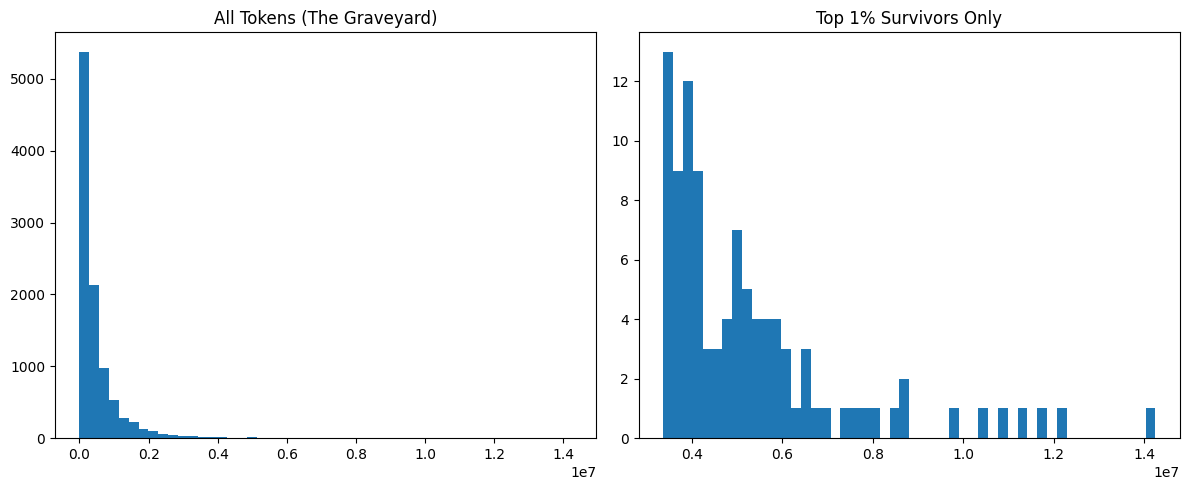

In [18]:
# MemeCoin Graveyard Simulation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# 1. Simulate 10,000 token launches
n_tokens = 10000

# Use Pareto distribution (power law) to mimic crypto markets
# Most tokens ≈ near zero, few explode
peak_market_caps = np.random.pareto(a=3, size=n_tokens)

# Scale to make values look realistic
peak_market_caps = peak_market_caps * 1_000_000

# 2. Create full dataset (The Graveyard)
df_all = pd.DataFrame({
    "Peak Market Cap": peak_market_caps
})

# 3. Create survivors (Top 1% only)
threshold = np.percentile(df_all["Peak Market Cap"], 99)
df_survivors = df_all[df_all["Peak Market Cap"] >= threshold]

# 4. Compare means
mean_all = df_all["Peak Market Cap"].mean()
mean_survivors = df_survivors["Peak Market Cap"].mean()

print("Mean Market Cap (All Tokens):", mean_all)
print("Mean Market Cap (Top 1% Survivors):", mean_survivors)

# 5. Visualize Survivorship Bias
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df_all["Peak Market Cap"], bins=50)
plt.title("All Tokens (The Graveyard)")

plt.subplot(1,2,2)
plt.hist(df_survivors["Peak Market Cap"], bins=50)
plt.title("Top 1% Survivors Only")

plt.tight_layout()
plt.show()